In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [26]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [27]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [28]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [29]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


## Make an API Call

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [31]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

# 6.2.6 Get the City Weather Data

In [32]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [34]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print(f"City {city} not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | vanavara
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | bilma
Processing Record 7 of Set 1 | panormos
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | guntur
Processing Record 11 of Set 1 | constitucion
Processing Record 12 of Set 1 | mumford
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | los llanos de aridane
Processing Record 18 of Set 1 | cururupu
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | kainantu
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | pangody
Processing Record 23 of Set 1 | belushya guba
City belushya guba not found. Skipping...

Processing Record 35 of Set 4 | karaul
City karaul not found. Skipping...
Processing Record 36 of Set 4 | strezhevoy
Processing Record 37 of Set 4 | madimba
Processing Record 38 of Set 4 | turbo
Processing Record 39 of Set 4 | weligama
Processing Record 40 of Set 4 | caravelas
Processing Record 41 of Set 4 | jablah
Processing Record 42 of Set 4 | luangwa
Processing Record 43 of Set 4 | verkhoyansk
Processing Record 44 of Set 4 | palabuhanratu
City palabuhanratu not found. Skipping...
Processing Record 45 of Set 4 | inuvik
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | burnie
Processing Record 49 of Set 4 | vaitupu
City vaitupu not found. Skipping...
Processing Record 50 of Set 4 | champerico
Processing Record 1 of Set 5 | la ronge
Processing Record 2 of Set 5 | ayagoz
Processing Record 3 of Set 5 | mahebourg
Processing Record 4 of Set 5 | mukhanovo
City mukhanovo not found. Skipping...
Processing Record 5 of Set 5 | sai

Processing Record 19 of Set 8 | longyearbyen
Processing Record 20 of Set 8 | lagoa
Processing Record 21 of Set 8 | port-cartier
Processing Record 22 of Set 8 | codrington
Processing Record 23 of Set 8 | wufeng
Processing Record 24 of Set 8 | gobabis
Processing Record 25 of Set 8 | sorvag
City sorvag not found. Skipping...
Processing Record 26 of Set 8 | tubruq
City tubruq not found. Skipping...
Processing Record 27 of Set 8 | louisbourg
City louisbourg not found. Skipping...
Processing Record 28 of Set 8 | bilibino
Processing Record 29 of Set 8 | anadyr
Processing Record 30 of Set 8 | vila velha
Processing Record 31 of Set 8 | sao joao da barra
Processing Record 32 of Set 8 | kununurra
Processing Record 33 of Set 8 | kutum
Processing Record 34 of Set 8 | port elizabeth
Processing Record 35 of Set 8 | tineo
Processing Record 36 of Set 8 | jalu
Processing Record 37 of Set 8 | egvekinot
Processing Record 38 of Set 8 | arlit
Processing Record 39 of Set 8 | severo-kurilsk
Processing Record 

Processing Record 2 of Set 12 | berlevag
Processing Record 3 of Set 12 | tuatapere
Processing Record 4 of Set 12 | talnakh
Processing Record 5 of Set 12 | chamalieres
Processing Record 6 of Set 12 | gweta
Processing Record 7 of Set 12 | union
Processing Record 8 of Set 12 | impfondo
Processing Record 9 of Set 12 | gao
Processing Record 10 of Set 12 | anklam
Processing Record 11 of Set 12 | port moresby
Processing Record 12 of Set 12 | kon tum
Processing Record 13 of Set 12 | bathsheba
Processing Record 14 of Set 12 | chicama
Processing Record 15 of Set 12 | deputatskiy
Processing Record 16 of Set 12 | baruun-urt
Processing Record 17 of Set 12 | deyang
Processing Record 18 of Set 12 | sandwick
Processing Record 19 of Set 12 | gemena
Processing Record 20 of Set 12 | saint-denis
Processing Record 21 of Set 12 | kaz
Processing Record 22 of Set 12 | santa rosa
Processing Record 23 of Set 12 | nandi
Processing Record 24 of Set 12 | clarence town
Processing Record 25 of Set 12 | sao jose da c

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,44.60,87,75,6.93,CL,2020-05-22 21:12:19
1,Atuona,-9.80,-139.03,80.67,77,6,16.31,PF,2020-05-22 21:12:44
2,Kruisfontein,-34.00,24.73,55.65,94,0,5.48,ZA,2020-05-22 21:12:36
3,Vanavara,60.34,102.28,54.39,58,1,0.74,RU,2020-05-22 21:16:13
4,Hermanus,-34.42,19.23,61.00,70,3,13.35,ZA,2020-05-22 21:12:11
...,...,...,...,...,...,...,...,...,...
575,Beloha,-25.17,45.05,67.95,80,16,10.56,MG,2020-05-22 21:17:36
576,Khudumelapye,-23.88,24.75,56.39,50,0,5.70,BW,2020-05-22 21:17:36
577,Pochutla,15.74,-96.47,93.20,49,40,11.41,MX,2020-05-22 21:17:37
578,Eucaliptus,-17.58,-67.52,56.93,31,91,9.89,BO,2020-05-22 21:17:37


In [37]:
order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-05-22 21:12:19,-53.15,-70.92,44.60,87,75,6.93
1,Atuona,PF,2020-05-22 21:12:44,-9.80,-139.03,80.67,77,6,16.31
2,Kruisfontein,ZA,2020-05-22 21:12:36,-34.00,24.73,55.65,94,0,5.48
3,Vanavara,RU,2020-05-22 21:16:13,60.34,102.28,54.39,58,1,0.74
4,Hermanus,ZA,2020-05-22 21:12:11,-34.42,19.23,61.00,70,3,13.35
...,...,...,...,...,...,...,...,...,...
575,Beloha,MG,2020-05-22 21:17:36,-25.17,45.05,67.95,80,16,10.56
576,Khudumelapye,BW,2020-05-22 21:17:36,-23.88,24.75,56.39,50,0,5.70
577,Pochutla,MX,2020-05-22 21:17:37,15.74,-96.47,93.20,49,40,11.41
578,Eucaliptus,BO,2020-05-22 21:17:37,-17.58,-67.52,56.93,31,91,9.89


In [39]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

### Get Data for Plotting

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [44]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1590191611.4182277

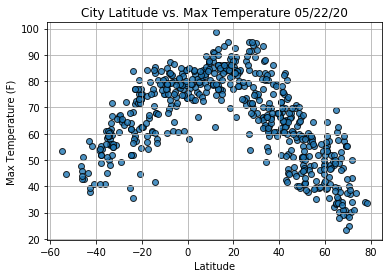

In [46]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

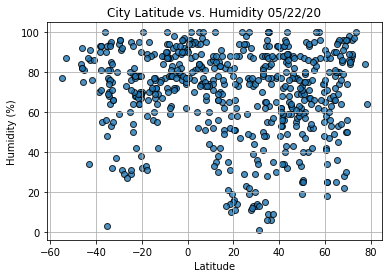

In [47]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

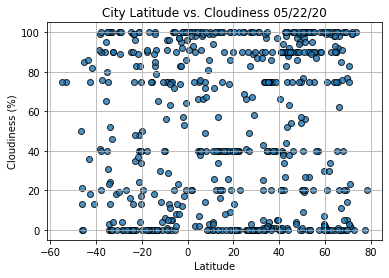

In [48]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

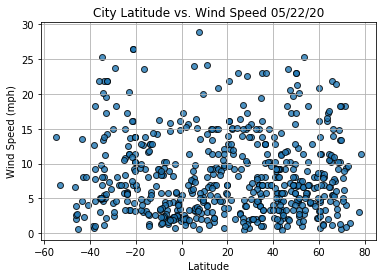

In [49]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()